# 8th Sept 2021
## Solving for energy integral (Pg.No. 22 Green Book)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft

In [2]:
#Defining Parameters
L=128            #lENGTH OF PROFILE
Δx=0.5
x= np.arange(0,L,Δx)

A=1.0
M=1.0
Kappa=1.0

Δkx = 2*np.pi/L

Δt=1
T=2000
time=np.arange(0,T+Δt,Δt)

In [3]:
def find_width(line):
    
    p1=0
    for i in range(int(n/2),-1,-1):
        if line[i] == 1:
            p1 = x[i]
            break
            
    p2 = 0
    for i in range(int(n/2),n,1):
        if line[i]==0:
            p2 = x[i]
            break
    if (p1!=0 and p2!=0):
        return abs(p2-p1)
    
    p1_left,p1_right= 0,0
    v1_left, v1_right= 0,0
    
    for i in range(int(n/2),-1,-1):
        if line[i]<1:
            p1_right = x[i]
            v1_right = line[i]
        if line[i]>1:
            p1_left = x[i]
            v1_left = line[i]
            break
    slope = (v1_right - v1_left) / (p1_right - p1_left)
    p1 = p1_right - (v1_right -1)/slope
            
    p0_left,p0_right= 0,0
    v0_left, v0_right= 0,0
    
    for i in range(int(n/2),n,1):
        if line[i]>0:
            p0_left = x[i]
            v0_left = line[i]
        if line[i]<0:
            p0_right = x[i]
            v0_right = line[i]
            break
            
    slope_0 = (v0_right - v0_left) / (p0_right - p0_left)
    p0 = p0_right - (v0_right - 0)/slope_0
    
    return p0-p1

def find_width_alt_method(x,arr,a): #a is the x coordinate of interface point
    left_if_point, right_if_point =0,0
    value_left_if_point, value_right_if_point =0,0
    for i in range(len(x)):
        if arr[i]> 0.5:
            left_if_point = x[i]
            value_left_if_point = arr[i]
            
        if arr[i]<0.5:
            right_if_point = x[i]
            value_right_if_point = arr[i]
            break
            
    slope = (value_right_if_point - value_left_if_point) / (right_if_point - left_if_point)
    
    tangent = 0.5 + slope * (x - a)
    
    
    p1_left,p1_right= 0,0
    v1_left, v1_right= 0,0
    
    for i in range(len(tangent)):
        if tangent[i]>1:
            p1_left = x[i]
            v1_left = tangent[i]
        if tangent[i]<1:
            p1_right = x[i]
            v1_right = tangent[i]
            break
    slope_1 = (v1_right - v1_left) / (p1_right - p1_left)
    p1 = p1_right - (v1_right -1)/slope_1
            
    p0_left,p0_right= 0,0
    v0_left, v0_right= 0,0
    
    for i in range(len(tangent)-1,-1,-1):
        if tangent[i]<0:
            p0_right = x[i]
            v0_right = tangent[i]
        if tangent[i]>0:
            p0_left = x[i]
            v0_left = tangent[i]
            break
            
    slope_0 = (v0_right - v0_left) / (p0_right - p0_left)
    p0 = p0_right - (v0_right - 0)/slope_0
    
    return (p1-p0)

<IPython.core.display.Javascript object>


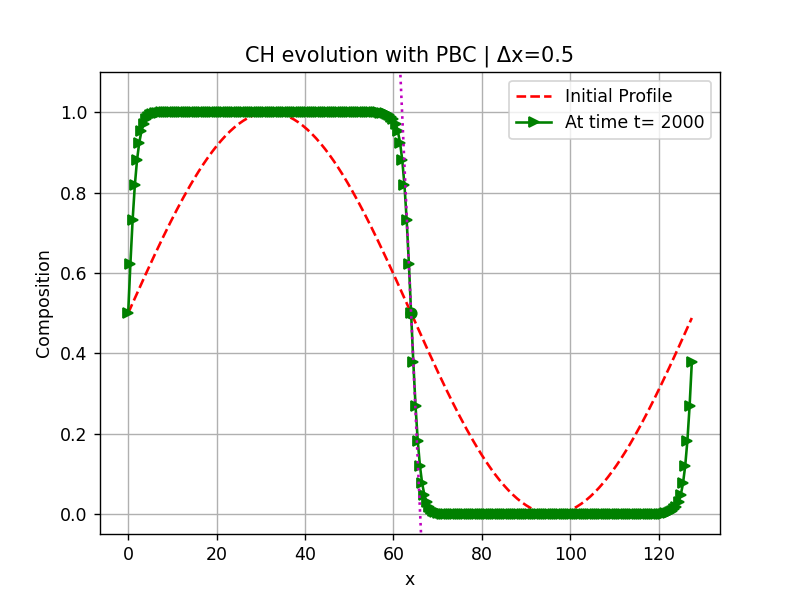

Average composition initially is 0.5
Average composition at time 2000 is 0.5


In [4]:
%matplotlib notebook
#plt.figure(figsize = (8, 6))

c_integral=[]
count_array=[]

c= 0.5*(1+np.sin(2*np.pi*x/L))

plt.plot(x,c,'r--',label='Initial Profile')
print('Average composition initially is '+str(np.average(c)))

n= len(x)

for t in time:
    
    g = 2*A*c*(1-c)*(1-2*c)
    
    g̃ = fft(g.real)
    c̃ = fft(c.real)
    
    for i in range(n):
        
        if i<= int(n/2):
            kx = i*Δkx
        else:
            kx = (i-n)*Δkx
            
        c̃[i] = (c̃[i] - Δt* M* kx**2 *g̃[i]) / (1+ 2*Δt* M* kx**4 *Kappa)
    
    c= ifft(c̃)
    
    
    if t%100 ==0:
        c_integral.append(c.real)
        count_array.append(t)
        
plt.plot(x,c.real,'g',marker='>',label='At time t= '+str(T))
print('Average composition at time '+str(T)+' is '+str(np.average(c.real)))

a= int(n/2)
h= Δx
c_prime=  (c.real[a+1] - c.real[a])/h
tangent= c.real[a] + c_prime*(x-x[a])
plt.plot(x[a],c.real[a],'go', x,tangent,'m:')
plt.xlabel('x')
plt.ylabel('Composition')
plt.title('CH evolution with PBC | Δx='+str(Δx))
plt.ylim(-0.05,1.1)
plt.grid(True)
plt.legend()
plt.show()

In [5]:
#print(len(c))

# Finding slope at point 50

In [6]:
m= int(n/2)
c= c.real
f_slope= (c[m] - c[m+1] )/ (x[m]-x[m+1])
b_slope= (c[m] - c[m-1] )/ (x[m]-x[m-1])
c_slope= (c[m-1] - c[m+1] )/ (x[m-1]-x[m+1])

print(f'Forward slope at point 50 is {abs(f_slope)}\n')
print(f'Backward slope at point 50 is {abs(b_slope)}\n')
print(f'Central slope at point 50 is {abs(c_slope)}')

Forward slope at point 50 is 0.24491692891262307

Backward slope at point 50 is 0.2449169289126416

Central slope at point 50 is 0.24491692891263234



# Finding Interfacial Width

In [7]:
print(f'Interfacial width is {abs(1/f_slope)}')

interface_width = find_width(tangent)
print('the interface width calculated using tangent method is ',interface_width)

interface_width_alt = find_width_alt_method(x,c.real,x[a])
print('the interface width calculated using alternate tangent method is ',interface_width_alt)

Interfacial width is 4.083017063948085
the interface width calculated using tangent method is  4.083017063948091
the interface width calculated using alternate tangent method is  -4.0830170639477785


# Energy Integral

In [8]:
def f(x):
    return A* x**2* (1-x)**2

def slope(comp,i):
    if i==(n-1):
        ans = (comp[0] - comp[i]) / Δx
    else:
        ans = (comp[i+1] - comp[i]) / Δx
    return ans

<IPython.core.display.Javascript object>


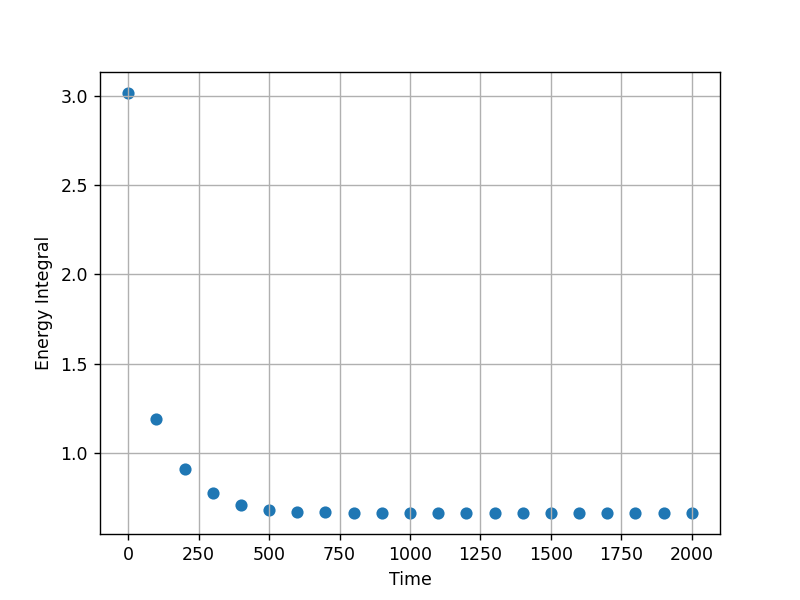

In [9]:
fig=plt.figure()

Total_energy=[]

for j in range(len(c_integral)):
    energy=0
    for i in range(int(L/Δx)):
        
        f_energy= f(c_integral[j][i])
        K_energy= Kappa * slope(c_integral[j],i)**2
        
        energy+= (f_energy + K_energy)* Δx
        
    Total_energy.append(energy)

plt.scatter(count_array,Total_energy)
plt.xlabel('Time')
plt.ylabel('Energy Integral')
plt.grid('True')
plt.show()

In [10]:
print(Total_energy)

[3.0146609268307314, 1.18943720388835, 0.9092875085125943, 0.7753055834396407, 0.7121058270914593, 0.6844365163410135, 0.6729179190266219, 0.6682777700043501, 0.6664471429115473, 0.6657341787260688, 0.6654586064207791, 0.6653525142002426, 0.6653117194865321, 0.6652960136408829, 0.6652899431858527, 0.665287579566879, 0.6652866480465732, 0.6652862740026031, 0.6652861196436042, 0.6652860534987152, 0.6652860237618098]
